# Part 5: Compiling to C
## Step 16
Conway's Game of Life is a classic example of a cellular automaton, first devised by the British mathematician John Horton Conway in 1970. This zero-player game unfolds on an infinite two-dimensional grid of cells, each of which can be in one of two states: alive (1) or dead (0). The evolution of the grid is determined by a set of rules that simulate the birth, death, and survival of cells.

The game progresses in discrete time steps, or generations. At each step, the state of every cell is updated simultaneously based on the states of its eight neighboring cells.

- An alive cell will remain alive in the next generation if it has two or three living neighbors, reflecting survival.
- An alive cell will die if it has fewer than two or more than three living neighbors.
- A dead cell will become alive if it has exactly three living neighbors, representing reproduction.
- In all other cases, a dead cell remains dead.

While the Game of Life is conceptually straightforward and can be implemented in any programming language, its computational performance can vary dramatically depending on the approach used. This is where the journey from Python to C through Cython becomes particularly interesting. Python, known for its readability and ease of use, is not always the most efficient language for processing intensive computational tasks such as simulating the Game of Life over large grids or for many generations. This is primarily due to its high-level nature and the overhead of dynamic typing.

To address these performance concerns, we explore five different implementations of the Game of Life: one in Python and four progressively optimized versions using Cython.
### Python

In [1]:
from python import *

In [2]:
import timeit

def initialize_lattice_with_cross(box_size):
    lattice = [[0 for _ in range(box_size)] for _ in range(box_size)]

    # Define the cross in the center
    center = box_size // 2
    for i in range(box_size):
        # Set middle column cells to 1
        lattice[i][center] = 1
        # Set middle row cells to 1
        lattice[center][i] = 1

    return lattice

# Assuming update and update_rule functions are defined as you provided
box_size = 300
lattice = initialize_lattice_with_cross(box_size)

# Time the update function
%timeit -n 1 -r 3 py_update(lattice)

35.5 ms ± 4.39 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


This implementation uses the `update` function, that computes the next generation of the lattice (grid), following the rules of the Game of Life. And the `update_rule` function determines the fate of a single cell based on its neighbors' states.

The `initialize_lattice_with_cross` function creates an initial grid (lattice) with a specific size (box_size), and initializes it to have a "cross" pattern of living cells at the center.

Together, these functions set up the initial state of the grid and then evolve it by one generation.
### Cython 1

In [3]:
from cython1 import *

In [9]:
def initialize_lattice_with_cross(box_size):
    lattice = [[0 for _ in range(box_size)] for _ in range(box_size)]

    # Define the cross in the center
    center = box_size // 2
    for i in range(box_size):
        # Set middle column cells to 1
        lattice[i][center] = 1
        # Set middle row cells to 1
        lattice[center][i] = 1

    return lattice

box_size = 300
lattice = initialize_lattice_with_cross(box_size)

# Time the update function
%timeit -n 1 -r 3 c1_update(lattice)

31.1 ms ± 4.99 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


The functions of this version use Cython. The code improves primarily the compilation process. Cython compiles Python code to C, which is then compiled to machine code, leading to faster execution times. 

In this case, the nested for-loops in `update`, which iterate over each cell in the lattice, run faster because compiled C loops are more efficient than their interpreted Python counterparts. Also, the function `c1_update_rule` is called repeatedly within these loops. In Python, function calls are expensive, but in Cython, they can be optimized, especially if type declarations are used. Lastly, since the code is running at the C level, the overhead of Python's dynamic type checking and other runtime checks are avoided, resulting in performance gains.

In this version, changes were not made to the logic of the code; the improvement is result of the Cython compilation process and the efficiencies it brings to Python code execution.
### Cython 2

In [5]:
from cython2 import *

In [7]:
box_size = 300
lattice = initialize_lattice_with_cross(box_size)

# Time the update function
%timeit -n 1 -r 3 c2_update(lattice)

17.9 ms ± 3.45 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


In this implementation, the code has been adapted for Cython by adding type declarations to variables using `cdef`. These type declarations inform Cython that the variables are integers. This allows Cython to convert these Python variables into C variables when it compiles the code to C. By knowing the types beforehand, Cython can generate more optimized C code. This is because C is a statically-typed language, and when the types are known at compile time, the compiler can optimize the memory usage and the machine code it generates for operations involving those variables.
### Cython 3

In [8]:
from cython3 import *

In [10]:
box_size = 300
lattice = initialize_lattice_with_cross(box_size)

# Time the update function
%timeit -n 1 -r 3 c3_update(lattice)

15.1 ms ± 2.67 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


This version uses the `cdef` keyword in front of the `c3_update_rule` function declaration, indicating that the function is now a Cython function rather than a Python function. This change enhances performance further because Cython can now treat the function as a C function. As a result, when `c3_update_rule` is called from within the `c3_update` function, the call is made at C speed without the overhead of Python's function-calling mechanisms.

### Cython 4

In [11]:
from cython4 import *

In [12]:
box_size = 300
lattice = initialize_lattice_with_cross(box_size)

# Time the update function
%timeit -n 1 -r 3 c4_update(lattice)

14 ms ± 1.77 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


The directives at the top of this implementation are Cython compiler directives that instruct the Cython compiler to disable certain checks that are normally in place for safety but can slow down execution. By setting boundscheck=False, Cython skips checking whether index operations are within the bounds of the array or list. Similarly, wraparound=False disables the ability to use negative indices to access arrays from the end. These checks are useful and necessary for preventing errors in development and ensuring correctness in the code. However, they do incur a performance penalty due to the extra overhead. In tight loops, especially like those found in c4_update, which may be executed millions of times for large lattices, these checks can significantly slow down execution.

This implementation is particularly useful in scenarios where the code has been thoroughly tested, and it is certain that index errors will not occur. This typically comes into play with well-understood algorithms like the Game of Life, where the boundaries and indexing patterns are predictable after careful development and testing.
### Comparison

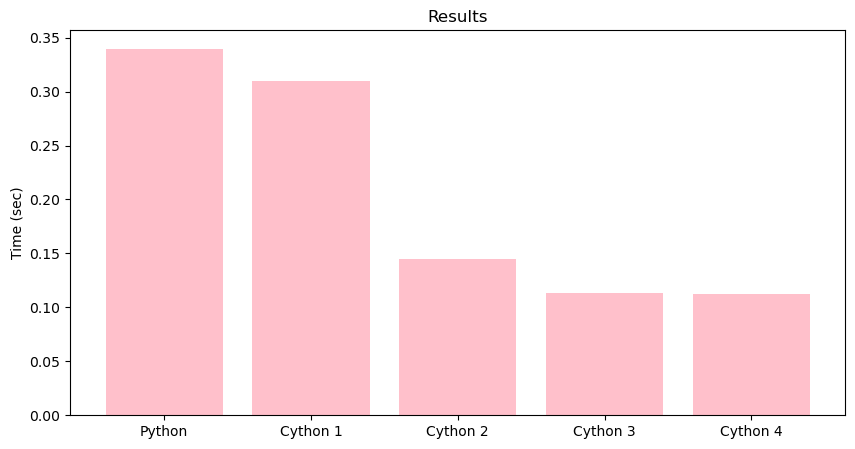

In [17]:
implementations = [py_update, c1_update, c2_update, c3_update, c4_update]
times = []

# Time each implementation
for implementation in implementations:
    t = timeit.timeit(lambda: implementation(lattice), number=10)
    times.append(t)

# Now plot the results
labels = ['Python', 'Cython 1', 'Cython 2', 'Cython 3', 'Cython 4']
plt.figure(figsize=(10, 5))
plt.bar(labels, times, color='pink')
plt.ylabel('Time (sec)')
plt.title('Results')
plt.show()

### Conclusion
The progression from Python to increasingly refined Cython code demonstrates a consistent reduction in execution time, as shown in the tests. With each code implementation, strategic enhancements were integrated, such as type declarations and the removal of safety checks, resulting in a leaner and more efficient execution path that maximizes the hardware's potential.

The trend is evident; as the code moves from the flexibility and simplicity of Python to the rigidity and raw speed of C, the performance benefits become clear. The initial transition to Cython offers a modest boost, but as the implementations dive deeper into Cython's capabilities, exploiting its ability to act as a bridge between Python's expressiveness and C's performance, we see that the execution time continues to drop. The culmination of this process in the fourth Cython implementation is the most performant, showcasing that for computationally intensive applications the careful application of Cython's features can lead to significant speed enhancements.